In [1]:
import numpy as np
import math
import sympy as sy
import matplotlib.pyplot as plt
from scipy import constants

In [2]:
rot_temp = constants.Planck*0.402*100*constants.c / constants.Boltzmann
print(rot_temp)

vib_temp = constants.Planck*64200*constants.c / constants.Boltzmann
print(vib_temp*0.9614)

vib_temp = constants.Planck*123000*constants.c / constants.Boltzmann
print(vib_temp*0.9614)

vib_temp = constants.Planck*221200*constants.c / constants.Boltzmann
print(vib_temp*0.9614)

0.5783883047565813
888.040137800725
1701.3853107397067
3059.7270791514075


In [12]:
Cv_vib = (1527/1000)*(sy.exp(-1527/1000)/((1-sy.exp(-1527/1000))**2))
R = 8.314 
e = math.exp(1)
def Cv_calc (vib, T):
    return (vib/T)**2*(e**(-vib/T)/((1-e**(-vib/T))**2))

vib = np.array([888.00,1701.00,3060.00]) # Values calculated from the previous cell
Cv_vib = 0
for v in vib:
    Cv_vib = Cv_vib + Cv_calc(v,310) # Calculating all the contributions in
    print(Cv_vib)
Cv_vib = Cv_vib + Cv_calc(888,310) # Accounting for degeneracy 
Cv_vib = Cv_vib + 3/2 + 2
Cv_vib = Cv_vib * constants.gas_constant # Multipling the whole term by the gas constant

print("Our molar heat capacity for NNO is ",Cv_vib)

0.5260723491282785
0.6517542315454984
0.656787585943035
Our molar heat capacity for NNO is  38.935463875480345


Upper Limit is 3Nkb, so for  26500  atoms:  1.097615955e-18
Upper Limit is 3Nkb, so for  1470  atoms:  6.08866209e-20


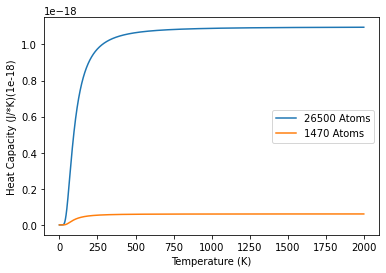

In [15]:
e = math.exp(1)
def vibrational_constribution(freq, T):
    return ((e**(-constants.Planck*freq/(constants.Boltzmann*T)))/(1-e**(-constants.Planck*freq/(constants.Boltzmann*T)))**2)
def vib_heat(freq,atoms,T):
    return (3* atoms* constants.Boltzmann*((constants.Planck*freq/(constants.Boltzmann*T)))**2 * vibrational_constribution(freq,T))

freq = np.array([20800,21000])

freq = freq *constants.c 

atoms = np.array([26500,1470])
temp = np.linspace(0.01,2000,10000)
"""for v in range(len(freq)):
    plt.plot(temp,vib_heat(freq[v],atoms[v],temp), label=str(atoms)+' Atoms')"""
plt.plot(temp,vib_heat(freq[0],atoms[0],temp), label=str(atoms[0])+' Atoms')
plt.plot(temp,vib_heat(freq[1],atoms[1],temp), label=str(atoms[1])+' Atoms')
plt.xlabel("Temperature (K)")
plt.ylabel("Heat Capacity (J/*K)(1e-18)")
plt.legend()
# plt.plot(temp,vib_heat(freq[1],atoms[1],temp))
for N in atoms:
    print("Upper Limit is 3Nkb, so for ", N,  " atoms: ", N*constants.Boltzmann*3)
